### Imports

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path 
from scipy.signal import savgol_filter

### Reading in Values

In [2]:
frco = pd.read_csv("FRCO.csv")
zero = pd.read_csv("ZERO.csv")
fracc = pd.read_csv("FRACC.csv")
frturn = pd.read_csv("FRTURN.csv")
bkbr = pd.read_csv("BKBR.csv")
bkturn = pd.read_csv("BKTN.csv")

### Splitting Up Data

In [3]:
frcoNoTime = frco[['gauge1', 'gauge2', 'gauge3', 'gauge4', 'gauge5', 'gauge6']]
frcoTime = frco[['time']]

zeroNoTime = zero[['gauge1', 'gauge2', 'gauge3', 'gauge4', 'gauge5', 'gauge6']]
zeroTime = zero[['time']]

fraccNoTime = fracc[['gauge1', 'gauge2', 'gauge3', 'gauge4', 'gauge5', 'gauge6']]
fraccTime = fracc[['time']]

frturnNoTime = frturn[['gauge1', 'gauge2', 'gauge3', 'gauge4', 'gauge5', 'gauge6']]
frturnTime = frturn[['time']]

bkbrNoTime = bkbr[['gauge1', 'gauge2', 'gauge3', 'gauge4', 'gauge5', 'gauge7']]
bkbrTime = bkbr[['time']]

bkturnNoTime = bkturn[['gauge1', 'gauge2', 'gauge3', 'gauge4', 'gauge5', 'gauge6']]
bkturnTime = bkturn[['time']]

In [4]:
#Accidentally named gauge 6, changing to proper name
bkbrNoTime = bkbrNoTime.rename(columns={"gauge7": "gauge6"})

### Converting all values to voltage readings

In [5]:
frcoNoTimeV = frcoNoTime.apply(lambda a: (a *2.5) / 1023)
zeroNoTimeV = zeroNoTime.apply(lambda a: (a *2.5) / 1023)
fraccNoTimeV = fraccNoTime.apply(lambda a: (a *2.5) / 1023)
frturnNoTimeV = frturnNoTime.apply(lambda a: (a *2.5) / 1023)
bkbrNoTimeV = bkbrNoTime.apply(lambda a: (a *2.5) / 1023)
bkturnNoTimeV = bkturnNoTime.apply(lambda a: (a *2.5) / 1023)

### Zeroing readings for Front Cone

In [6]:
frcoNoTimeVg1 = frcoNoTimeV[['gauge1']]
frcoNoTimeVg2 = frcoNoTimeV[['gauge2']]
frcoNoTimeVg3 = frcoNoTimeV[['gauge3']]
frcoNoTimeVg4 = frcoNoTimeV[['gauge4']]
frcoNoTimeVg5 = frcoNoTimeV[['gauge5']]
frcoNoTimeVg6 = frcoNoTimeV[['gauge6']]

frcoNoTimeVg1Zeroed = frcoNoTimeVg1.apply(lambda a: a - zeroNoTimeV['gauge1'].mean())
frcoNoTimeVg2Zeroed = frcoNoTimeVg2.apply(lambda a: a - zeroNoTimeV['gauge2'].mean())
frcoNoTimeVg3Zeroed = frcoNoTimeVg3.apply(lambda a: a - zeroNoTimeV['gauge3'].mean())
frcoNoTimeVg4Zeroed = frcoNoTimeVg4.apply(lambda a: a - zeroNoTimeV['gauge4'].mean())
frcoNoTimeVg5Zeroed = frcoNoTimeVg5.apply(lambda a: a - zeroNoTimeV['gauge5'].mean())
frcoNoTimeVg6Zeroed = frcoNoTimeVg6.apply(lambda a: a - zeroNoTimeV['gauge6'].mean())

frcoNoTimeVZeroed = pd.concat([frcoNoTimeVg1Zeroed, frcoNoTimeVg2Zeroed, frcoNoTimeVg3Zeroed,
                               frcoNoTimeVg4Zeroed, frcoNoTimeVg5Zeroed, frcoNoTimeVg6Zeroed], axis=1)

### Zeroing readings for Front Acceleration/Braking

In [7]:
fraccNoTimeVg1 = fraccNoTimeV[['gauge1']]
fraccNoTimeVg2 = fraccNoTimeV[['gauge2']]
fraccNoTimeVg3 = fraccNoTimeV[['gauge3']]
fraccNoTimeVg4 = fraccNoTimeV[['gauge4']]
fraccNoTimeVg5 = fraccNoTimeV[['gauge5']]
fraccNoTimeVg6 = fraccNoTimeV[['gauge6']]

fraccNoTimeVg1Zeroed = fraccNoTimeVg1.apply(lambda a: a - zeroNoTimeV['gauge1'].mean())
fraccNoTimeVg2Zeroed = fraccNoTimeVg2.apply(lambda a: a - zeroNoTimeV['gauge2'].mean())
fraccNoTimeVg3Zeroed = fraccNoTimeVg3.apply(lambda a: a - zeroNoTimeV['gauge3'].mean())
fraccNoTimeVg4Zeroed = fraccNoTimeVg4.apply(lambda a: a - zeroNoTimeV['gauge4'].mean())
fraccNoTimeVg5Zeroed = fraccNoTimeVg5.apply(lambda a: a - zeroNoTimeV['gauge5'].mean())
fraccNoTimeVg6Zeroed = fraccNoTimeVg6.apply(lambda a: a - zeroNoTimeV['gauge6'].mean())

fraccNoTimeVZeroed = pd.concat([fraccNoTimeVg1Zeroed, fraccNoTimeVg2Zeroed, fraccNoTimeVg3Zeroed,
                               fraccNoTimeVg4Zeroed, fraccNoTimeVg5Zeroed, fraccNoTimeVg6Zeroed], axis = 1)

### Zeroing Readings for Front Turning

In [8]:
frturnNoTimeVg1 = frturnNoTimeV[['gauge1']]
frturnNoTimeVg2 = frturnNoTimeV[['gauge2']]
frturnNoTimeVg3 = frturnNoTimeV[['gauge3']]
frturnNoTimeVg4 = frturnNoTimeV[['gauge4']]
frturnNoTimeVg5 = frturnNoTimeV[['gauge5']]
frturnNoTimeVg6 = frturnNoTimeV[['gauge6']]

frturnNoTimeVg1Zeroed = frturnNoTimeVg1.apply(lambda a: a - zeroNoTimeV['gauge1'].mean())
frturnNoTimeVg2Zeroed = frturnNoTimeVg2.apply(lambda a: a - zeroNoTimeV['gauge2'].mean())
frturnNoTimeVg3Zeroed = frturnNoTimeVg3.apply(lambda a: a - zeroNoTimeV['gauge3'].mean())
frturnNoTimeVg4Zeroed = frturnNoTimeVg4.apply(lambda a: a - zeroNoTimeV['gauge4'].mean())
frturnNoTimeVg5Zeroed = frturnNoTimeVg5.apply(lambda a: a - zeroNoTimeV['gauge5'].mean())
frturnNoTimeVg6Zeroed = frturnNoTimeVg6.apply(lambda a: a - zeroNoTimeV['gauge6'].mean())

frturnNoTimeVZeroed = pd.concat([frturnNoTimeVg1Zeroed, frturnNoTimeVg2Zeroed, frturnNoTimeVg3Zeroed,
                                 frturnNoTimeVg4Zeroed, frturnNoTimeVg5Zeroed, frturnNoTimeVg6Zeroed], axis = 1)

### Zeroing Readings for Back Braking

In [9]:
bkbrNoTimeVg1 = bkbrNoTimeV[['gauge1']]
bkbrNoTimeVg2 = bkbrNoTimeV[['gauge2']]
bkbrNoTimeVg3 = bkbrNoTimeV[['gauge3']]
bkbrNoTimeVg4 = bkbrNoTimeV[['gauge4']]
bkbrNoTimeVg5 = bkbrNoTimeV[['gauge5']]
bkbrNoTimeVg6 = bkbrNoTimeV[['gauge6']]

bkbrNoTimeVg1Zeroed = bkbrNoTimeVg1.apply(lambda a: a - zeroNoTimeV['gauge1'].mean())
bkbrNoTimeVg2Zeroed = bkbrNoTimeVg2.apply(lambda a: a - zeroNoTimeV['gauge2'].mean())
bkbrNoTimeVg3Zeroed = bkbrNoTimeVg3.apply(lambda a: a - zeroNoTimeV['gauge3'].mean())
bkbrNoTimeVg4Zeroed = bkbrNoTimeVg4.apply(lambda a: a - zeroNoTimeV['gauge4'].mean())
bkbrNoTimeVg5Zeroed = bkbrNoTimeVg5.apply(lambda a: a - zeroNoTimeV['gauge5'].mean())
bkbrNoTimeVg6Zeroed = bkbrNoTimeVg6.apply(lambda a: a - zeroNoTimeV['gauge6'].mean())

bkbrNoTimeVZeroed = pd.concat([bkbrNoTimeVg1Zeroed, bkbrNoTimeVg2Zeroed, bkbrNoTimeVg3Zeroed,
                               bkbrNoTimeVg4Zeroed, bkbrNoTimeVg5Zeroed, bkbrNoTimeVg6Zeroed], axis = 1)

### Zeroing Readings for Back Turning

In [10]:
bkturnNoTimeVg1 = bkbrNoTimeV[['gauge1']]
bkturnNoTimeVg2 = bkbrNoTimeV[['gauge2']]
bkturnNoTimeVg3 = bkbrNoTimeV[['gauge3']]
bkturnNoTimeVg4 = bkbrNoTimeV[['gauge4']]
bkturnNoTimeVg5 = bkbrNoTimeV[['gauge5']]
bkturnNoTimeVg6 = bkbrNoTimeV[['gauge6']]

bkturnNoTimeVg1Zeroed = bkturnNoTimeVg1.apply(lambda a: a - zeroNoTimeV['gauge1'].mean())
bkturnNoTimeVg2Zeroed = bkturnNoTimeVg2.apply(lambda a: a - zeroNoTimeV['gauge2'].mean())
bkturnNoTimeVg3Zeroed = bkturnNoTimeVg3.apply(lambda a: a - zeroNoTimeV['gauge3'].mean())
bkturnNoTimeVg4Zeroed = bkturnNoTimeVg4.apply(lambda a: a - zeroNoTimeV['gauge4'].mean())
bkturnNoTimeVg5Zeroed = bkturnNoTimeVg5.apply(lambda a: a - zeroNoTimeV['gauge5'].mean())
bkturnNoTimeVg6Zeroed = bkturnNoTimeVg6.apply(lambda a: a - zeroNoTimeV['gauge6'].mean())

bkturnNoTimeVZeroed = pd.concat([bkturnNoTimeVg1Zeroed, bkturnNoTimeVg2Zeroed, bkturnNoTimeVg3Zeroed,
                                 bkturnNoTimeVg4Zeroed, bkturnNoTimeVg5Zeroed, bkturnNoTimeVg6Zeroed], axis = 1)

### Converting to Strain

In [11]:
# 2500 is derived by dividing the value by the excitation voltage, multiplying by the gage factor
# and dividing by 1000

frcoNoTimeVZeroedStrain = frcoNoTimeVZeroed.apply(lambda a: a/2500)
fraccNoTimeVZeroedStrain = fraccNoTimeVZeroed.apply(lambda a: a/2500)
frturnNoTimeVZeroedStrain = frturnNoTimeVZeroed.apply(lambda a: a/2500)
bkbrNoTimeVZeroedStrain = bkbrNoTimeVZeroed.apply(lambda a: a/2500)
bkturnNoTimeVZeroedStrain = bkturnNoTimeVZeroed.apply(lambda a: a/2500)

### Recombining with time values

In [12]:
frcoVZeroedStrain = pd.concat([frcoTime, frcoNoTimeVZeroedStrain], axis=1)
fraccVZeroedStrain = pd.concat([fraccTime, fraccNoTimeVZeroedStrain], axis = 1)
frturnVZeroedStrain = pd.concat([frturnTime, frturnNoTimeVZeroedStrain], axis = 1)
bkbrVZeroedStrain = pd.concat([bkbrTime, bkbrNoTimeVZeroedStrain], axis = 1)
bkturnVZeroedStrain = pd.concat([bkturnTime, bkturnNoTimeVZeroedStrain], axis = 1)

### Plotting Front Cone - pre filtered

<AxesSubplot:xlabel='time'>

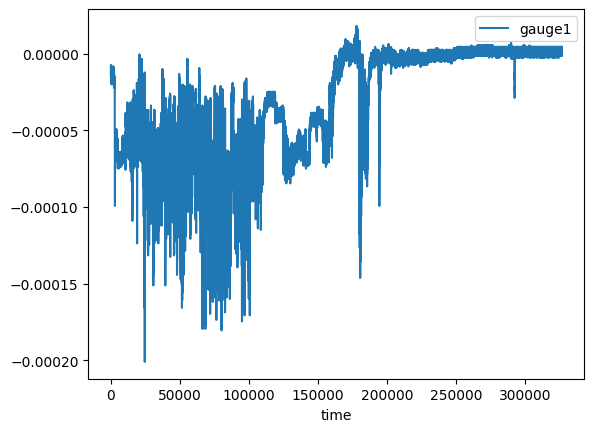

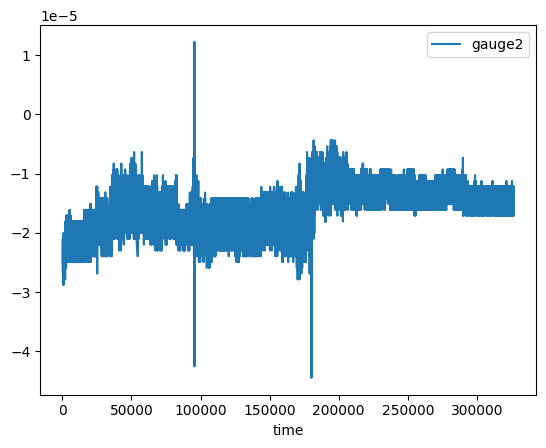

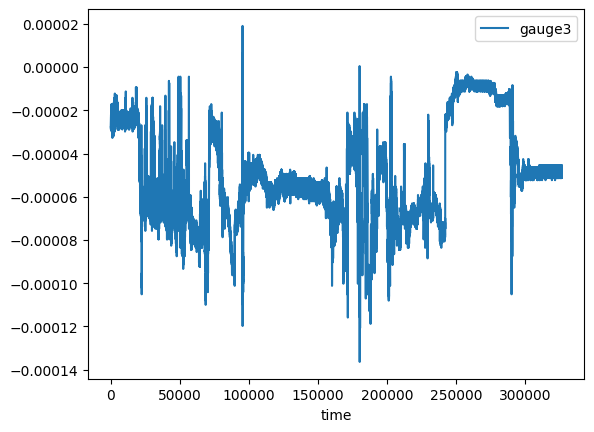

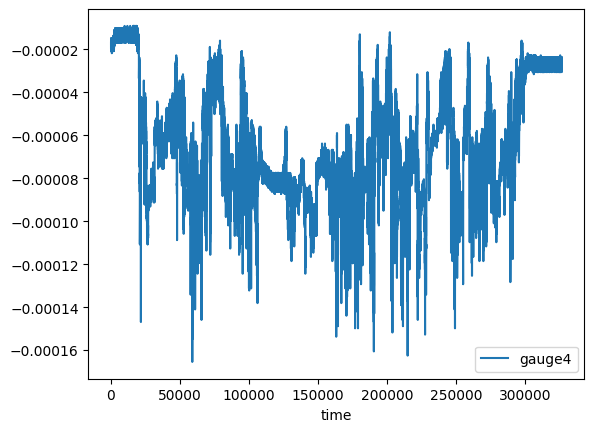

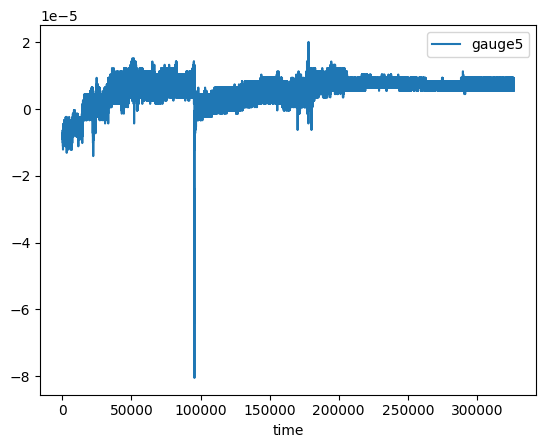

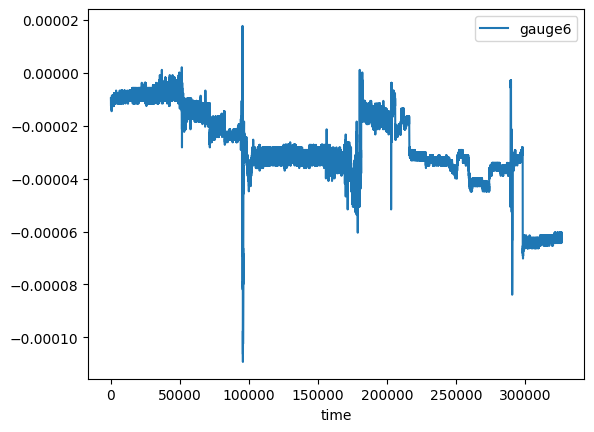

In [13]:
frcoVZeroedStrain.plot(x = "time", y = "gauge1", kind = 'line')
frcoVZeroedStrain.plot(x = "time", y = "gauge2", kind = 'line')
frcoVZeroedStrain.plot(x = "time", y = "gauge3", kind = 'line')
frcoVZeroedStrain.plot(x = "time", y = "gauge4", kind = 'line')
frcoVZeroedStrain.plot(x = "time", y = "gauge5", kind = 'line')
frcoVZeroedStrain.plot(x = "time", y = "gauge6", kind = 'line')

### Front Cone Numbers - Pre filtered

In [63]:
frcoVZeroedStrain.describe()

,time,gauge1,gauge2,gauge3,gauge4,gauge5,gauge6
count,110700.000000,110700.000000,110700.000000,110700.000000,110700.000000,110700.000000,110700.000000
mean,162817.040596,-0.000030,-0.000015,-0.000050,-0.000065,0.000006,-0.000028
std,94412.799057,0.000035,0.000004,0.000022,0.000027,0.000004,0.000015
min,267.000000,-0.000201,-0.000044,-0.000136,-0.000166,-0.000081,-0.000109
25%,80805.500000,-0.000060,-0.000018,-0.000065,-0.000084,0.000004,-0.000034
50%,162559.000000,-0.000021,-0.000014,-0.000054,-0.000070,0.000006,-0.000030
75%,244629.500000,0.000001,-0.000012,-0.000036,-0.000044,0.000008,-0.000016
max,326679.000000,0.000018,0.000012,0.000019,-0.000009,0.000020,0.000018


### Plotting Front Acceleration/Braking - pre filtered

<AxesSubplot:xlabel='time'>

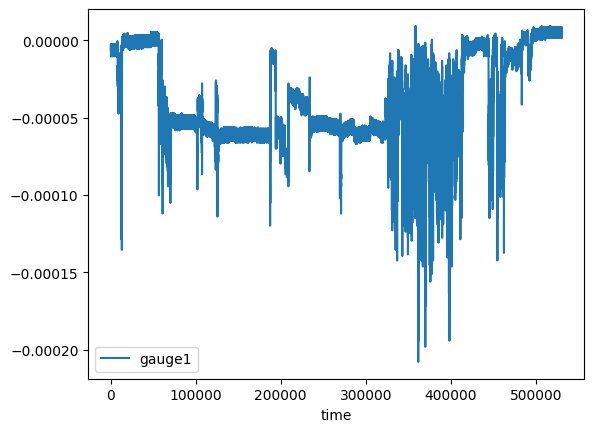

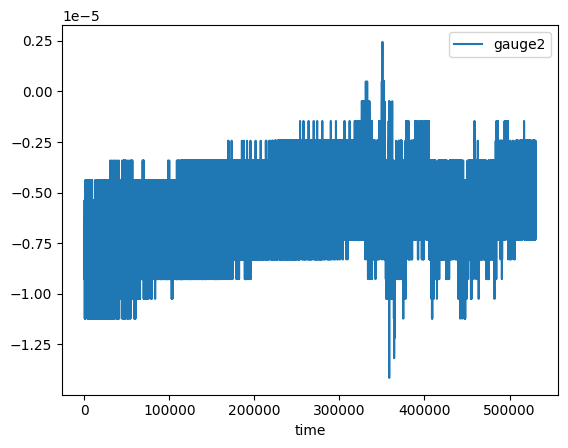

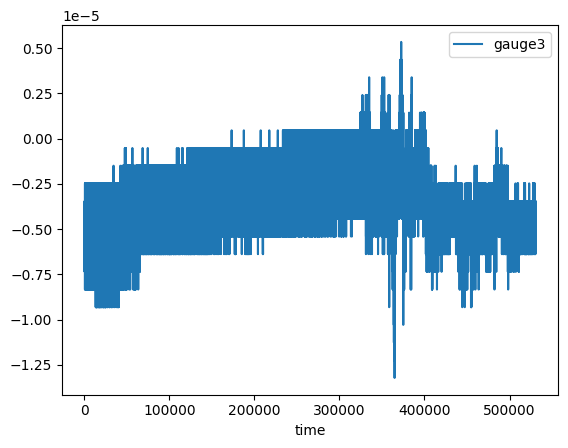

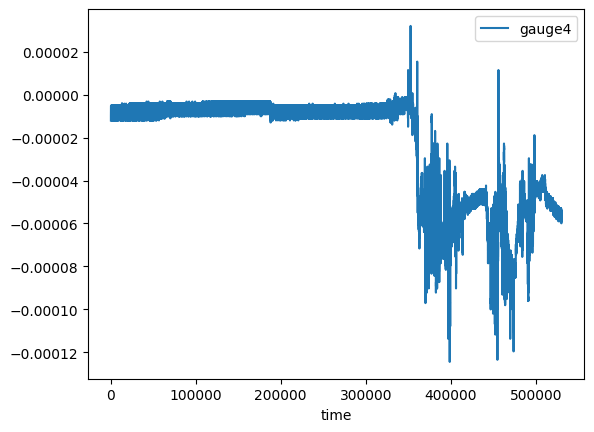

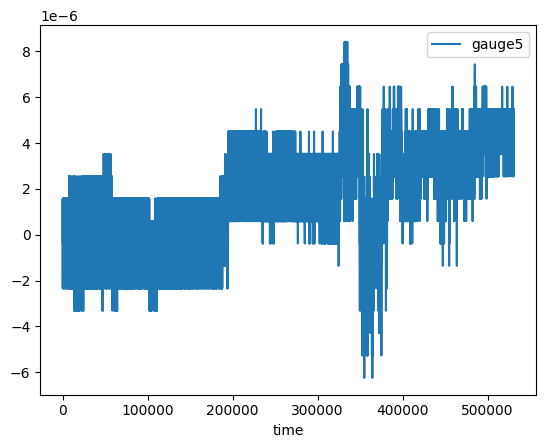

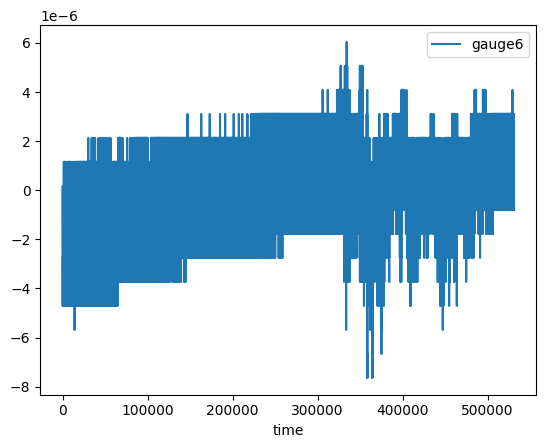

In [14]:
fraccVZeroedStrain.plot(x = "time", y = "gauge1", kind = 'line')
fraccVZeroedStrain.plot(x = "time", y = "gauge2", kind = 'line')
fraccVZeroedStrain.plot(x = "time", y = "gauge3", kind = 'line')
fraccVZeroedStrain.plot(x = "time", y = "gauge4", kind = 'line')
fraccVZeroedStrain.plot(x = "time", y = "gauge5", kind = 'line')
fraccVZeroedStrain.plot(x = "time", y = "gauge6", kind = 'line')

### Front Acceleration/Braking Numbers - pre filtered

In [64]:
fraccVZeroedStrain.describe()

,time,gauge1,gauge2,gauge3,gauge4,gauge5,gauge6
count,179550.000000,179550.000000,179550.000000,179550.000000,179550.000000,1.795500e+05,1.795500e+05
mean,264769.762963,-0.000036,-0.000005,-0.000003,-0.000023,1.863517e-06,-1.914051e-07
std,153391.772761,0.000027,0.000002,0.000002,0.000024,2.122747e-06,1.884553e-06
min,282.000000,-0.000208,-0.000014,-0.000013,-0.000124,-6.246995e-06,-7.644457e-06
25%,131571.250000,-0.000057,-0.000006,-0.000004,-0.000047,5.956246e-07,-1.779355e-06
50%,264653.500000,-0.000049,-0.000004,-0.000003,-0.000008,1.573142e-06,1.756796e-07
75%,397664.750000,-0.000005,-0.000003,-0.000001,-0.000006,3.528176e-06,1.153197e-06
max,530616.000000,0.000009,0.000002,0.000005,0.000032,8.415761e-06,6.040782e-06


### Plotting Front Turning - pre filtered

<AxesSubplot:xlabel='time'>

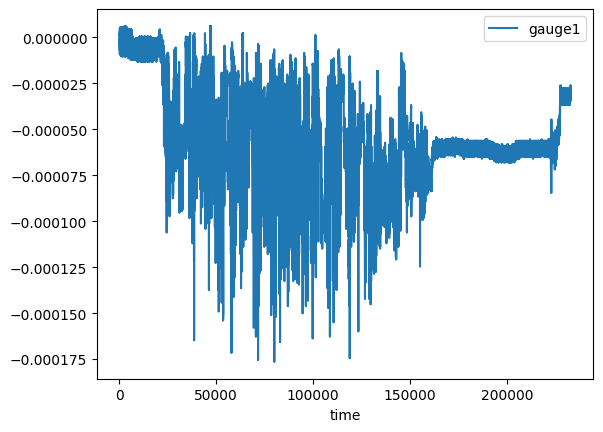

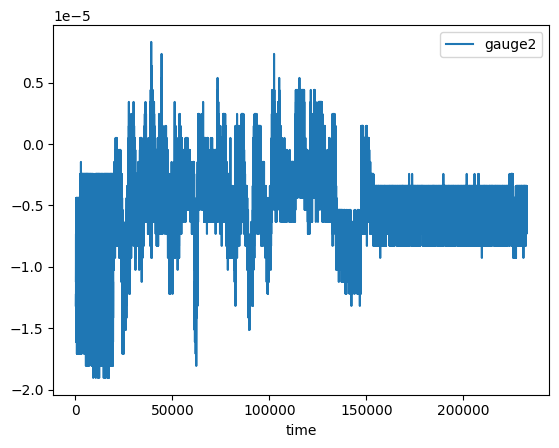

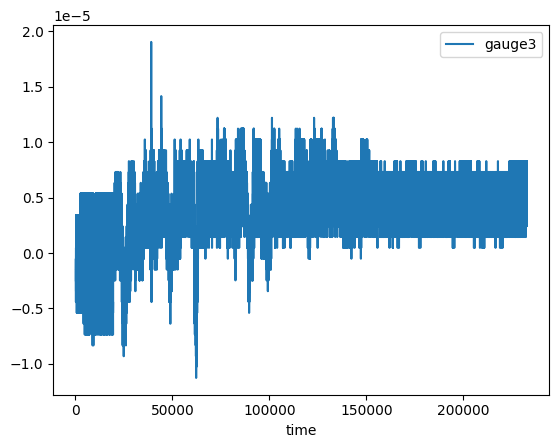

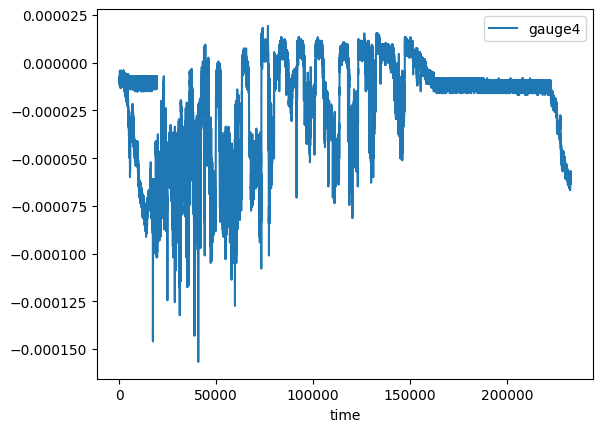

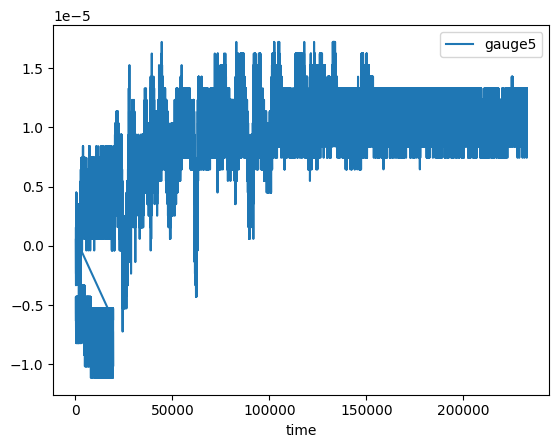

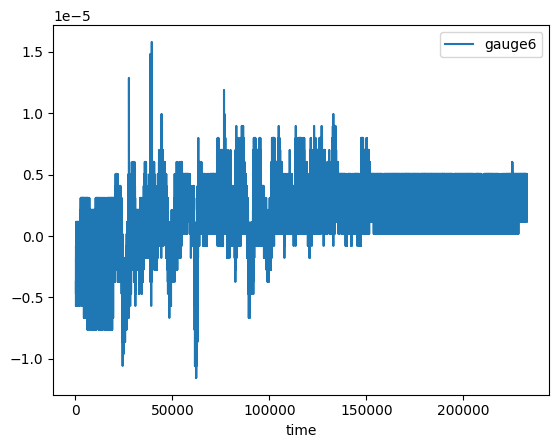

In [15]:
frturnVZeroedStrain.plot(x = "time", y = "gauge1", kind = 'line')
frturnVZeroedStrain.plot(x = "time", y = "gauge2", kind = 'line')
frturnVZeroedStrain.plot(x = "time", y = "gauge3", kind = 'line')
frturnVZeroedStrain.plot(x = "time", y = "gauge4", kind = 'line')
frturnVZeroedStrain.plot(x = "time", y = "gauge5", kind = 'line')
frturnVZeroedStrain.plot(x = "time", y = "gauge6", kind = 'line')

### Front Turn Numbers - pre filtered

In [65]:
frturnVZeroedStrain.describe()

,time,gauge1,gauge2,gauge3,gauge4,gauge5,gauge6
count,85770.000000,85770.000000,85770.000000,85770.000000,85770.000000,85770.000000,8.577000e+04
mean,107711.730687,-0.000049,-0.000005,0.000004,-0.000022,0.000008,1.443238e-06
std,70534.140822,0.000029,0.000003,0.000003,0.000025,0.000005,2.993632e-06
min,254.000000,-0.000177,-0.000019,-0.000011,-0.000157,-0.000011,-1.155453e-05
25%,43138.500000,-0.000064,-0.000006,0.000002,-0.000039,0.000007,1.756796e-07
50%,105723.500000,-0.000056,-0.000004,0.000004,-0.000012,0.000009,2.130714e-06
75%,169260.500000,-0.000028,-0.000003,0.000006,-0.000007,0.000011,3.108231e-06
max,232751.000000,0.000006,0.000008,0.000019,0.000019,0.000017,1.581595e-05


### Plotting Back Braking - pre filtered

<AxesSubplot:xlabel='time'>

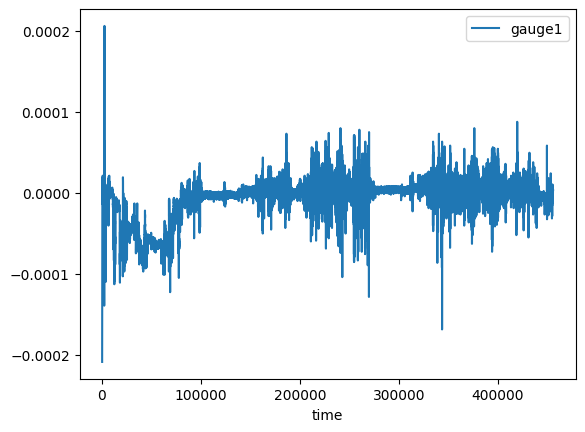

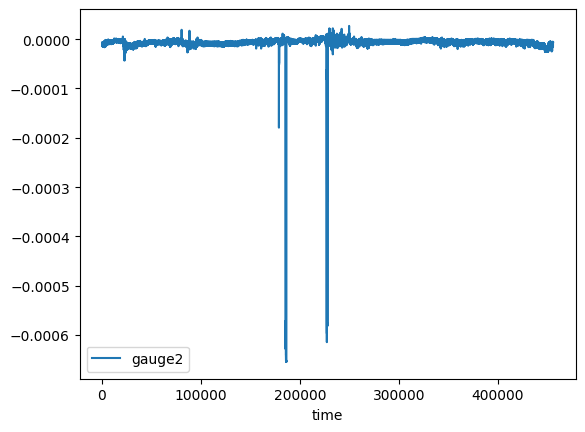

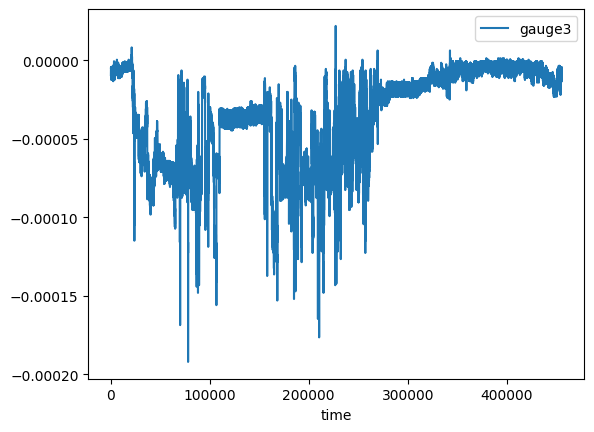

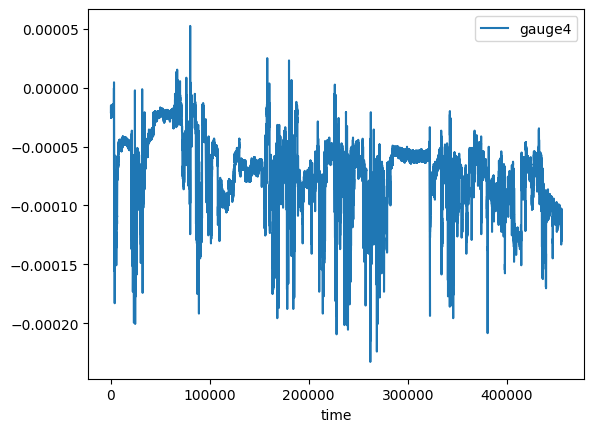

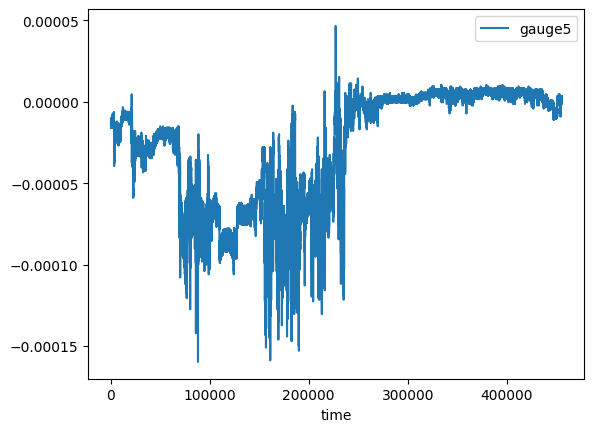

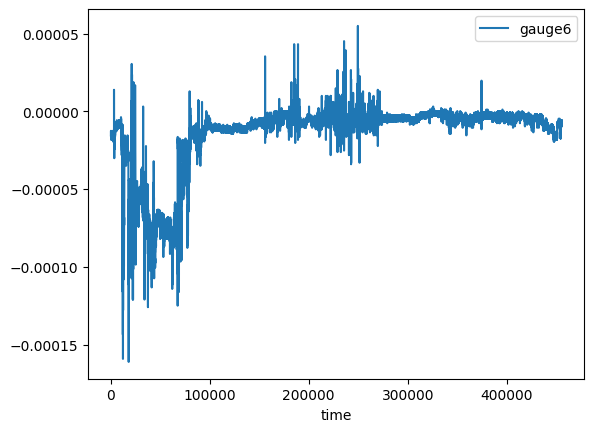

In [19]:
bkbrVZeroedStrain.plot(x = "time", y = "gauge1", kind = 'line')
bkbrVZeroedStrain.plot(x = "time", y = "gauge2", kind = 'line')
bkbrVZeroedStrain.plot(x = "time", y = "gauge3", kind = 'line')
bkbrVZeroedStrain.plot(x = "time", y = "gauge4", kind = 'line')
bkbrVZeroedStrain.plot(x = "time", y = "gauge5", kind = 'line')
bkbrVZeroedStrain.plot(x = "time", y = "gauge6", kind = 'line')

### Back Braking Numbers - pre filtered

In [66]:
bkbrVZeroedStrain.describe()

,time,gauge1,gauge2,gauge3,gauge4,gauge5,gauge6
count,154410.000000,154410.000000,154410.000000,154410.000000,154410.000000,154410.000000,154410.000000
mean,227291.995143,-0.000004,-0.000005,-0.000031,-0.000070,-0.000025,-0.000014
std,131702.679977,0.000023,0.000035,0.000029,0.000029,0.000034,0.000022
min,188.000000,-0.000209,-0.000654,-0.000192,-0.000233,-0.000160,-0.000161
25%,112836.250000,-0.000004,-0.000005,-0.000056,-0.000088,-0.000059,-0.000010
50%,227135.000000,0.000003,-0.000002,-0.000025,-0.000067,-0.000008,-0.000005
75%,341403.500000,0.000007,-0.000001,-0.000005,-0.000053,0.000005,-0.000003
max,455616.000000,0.000206,0.000027,0.000022,0.000052,0.000047,0.000055


### Plotting Back Turning - pre filtered

<AxesSubplot:xlabel='time'>

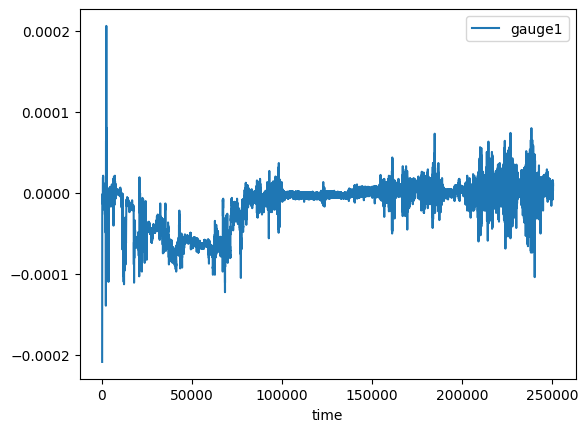

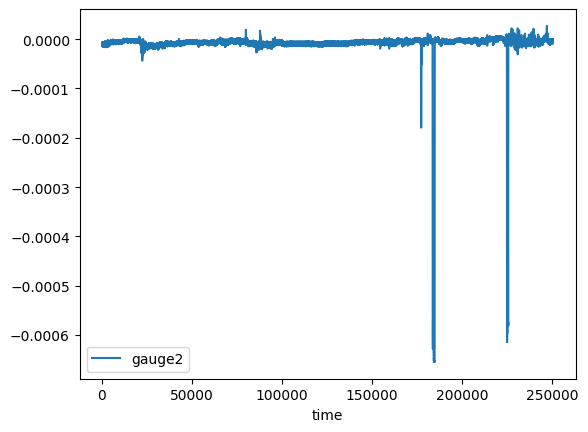

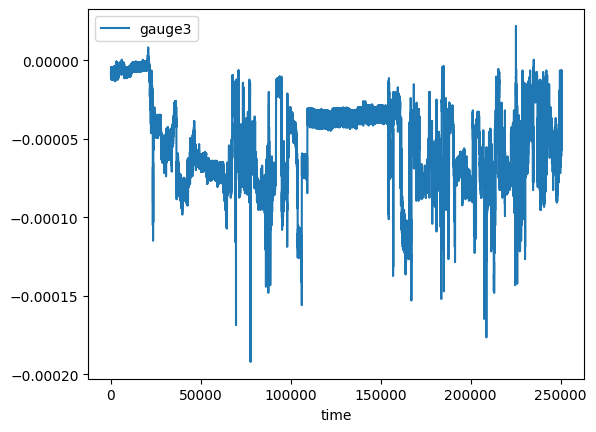

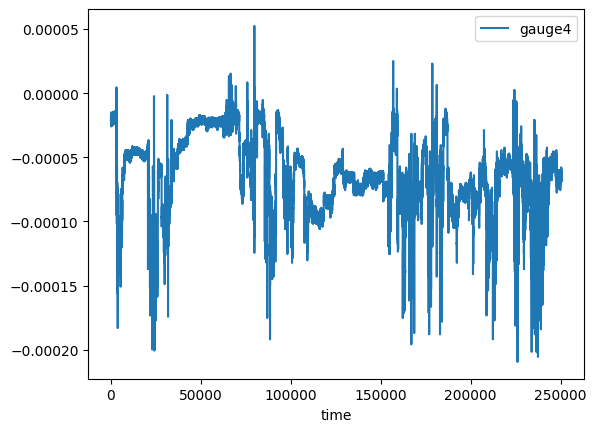

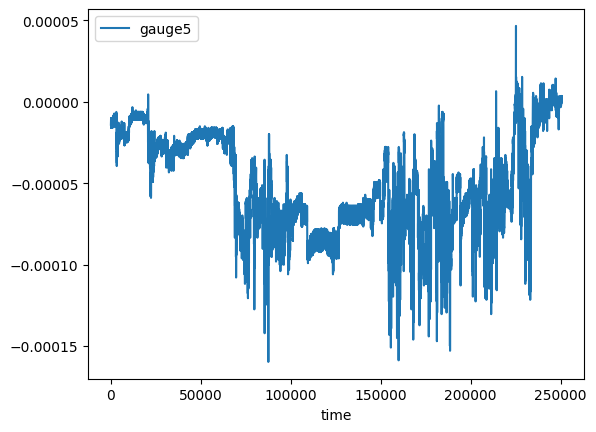

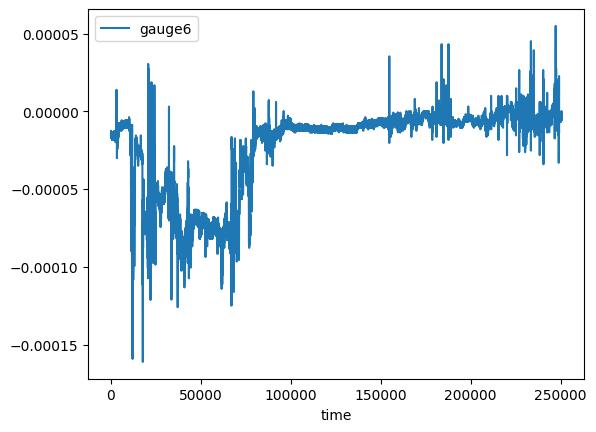

In [22]:
bkturnVZeroedStrain.plot(x = "time", y = "gauge1", kind = 'line')
bkturnVZeroedStrain.plot(x = "time", y = "gauge2", kind = 'line')
bkturnVZeroedStrain.plot(x = "time", y = "gauge3", kind = 'line')
bkturnVZeroedStrain.plot(x = "time", y = "gauge4", kind = 'line')
bkturnVZeroedStrain.plot(x = "time", y = "gauge5", kind = 'line')
bkturnVZeroedStrain.plot(x = "time", y = "gauge6", kind = 'line')

### Back Turning Numbers - pre filtering

In [67]:
bkturnVZeroedStrain.describe()

,time,gauge1,gauge2,gauge3,gauge4,gauge5,gauge6
count,85950.000000,154410.000000,154410.000000,154410.000000,154410.000000,154410.000000,154410.000000
mean,125137.221815,-0.000004,-0.000005,-0.000031,-0.000070,-0.000025,-0.000014
std,72427.811801,0.000023,0.000035,0.000029,0.000029,0.000034,0.000022
min,187.000000,-0.000209,-0.000654,-0.000192,-0.000233,-0.000160,-0.000161
25%,62316.250000,-0.000004,-0.000005,-0.000056,-0.000088,-0.000059,-0.000010
50%,125047.500000,0.000003,-0.000002,-0.000025,-0.000067,-0.000008,-0.000005
75%,187897.750000,0.000007,-0.000001,-0.000005,-0.000053,0.000005,-0.000003
max,250652.000000,0.000206,0.000027,0.000022,0.000052,0.000047,0.000055


### Filtering - Front Cone

In [53]:
frcoVZeroedStraing1 = frcoVZeroedStrain[['gauge1']]
frcoVZeroedStraing2 = frcoVZeroedStrain[['gauge2']]
frcoVZeroedStraing3 = frcoVZeroedStrain[['gauge3']]
frcoVZeroedStraing4 = frcoVZeroedStrain[['gauge4']]
frcoVZeroedStraing5 = frcoVZeroedStrain[['gauge5']]
frcoVZeroedStraing6 = frcoVZeroedStrain[['gauge6']]

frcoVZeroedStraing1array = frcoVZeroedStraing1.to_numpy()
frcoVZeroedStraing2array = frcoVZeroedStraing2.to_numpy()
frcoVZeroedStraing3array = frcoVZeroedStraing3.to_numpy()
frcoVZeroedStraing4array = frcoVZeroedStraing4.to_numpy()
frcoVZeroedStraing5array = frcoVZeroedStraing5.to_numpy()
frcoVZeroedStraing6array = frcoVZeroedStraing6.to_numpy()

frcoVZeroedStraing1array = np.ravel(frcoVZeroedStraing1array)
frcoVZeroedStraing2array = np.ravel(frcoVZeroedStraing2array)
frcoVZeroedStraing3array = np.ravel(frcoVZeroedStraing3array)
frcoVZeroedStraing4array = np.ravel(frcoVZeroedStraing4array)
frcoVZeroedStraing5array = np.ravel(frcoVZeroedStraing5array)
frcoVZeroedStraing6array = np.ravel(frcoVZeroedStraing6array)

frcoVZeroedStraing1arrayfiltered = savgol_filter(frcoVZeroedStraing1array, 25, 5)
frcoVZeroedStraing2arrayfiltered = savgol_filter(frcoVZeroedStraing2array, 25, 5)
frcoVZeroedStraing3arrayfiltered = savgol_filter(frcoVZeroedStraing3array, 25, 5)
frcoVZeroedStraing4arrayfiltered = savgol_filter(frcoVZeroedStraing4array, 25, 5)
frcoVZeroedStraing5arrayfiltered = savgol_filter(frcoVZeroedStraing5array, 25, 5)
frcoVZeroedStraing6arrayfiltered = savgol_filter(frcoVZeroedStraing6array, 25, 5)

frcoVZeroedStraing1filtered = pd.DataFrame(frcoVZeroedStraing1arrayfiltered, columns = ['gauge1'])
frcoVZeroedStraing2filtered = pd.DataFrame(frcoVZeroedStraing2arrayfiltered, columns = ['gauge2'])
frcoVZeroedStraing3filtered = pd.DataFrame(frcoVZeroedStraing3arrayfiltered, columns = ['gauge3'])
frcoVZeroedStraing4filtered = pd.DataFrame(frcoVZeroedStraing4arrayfiltered, columns = ['gauge4'])
frcoVZeroedStraing5filtered = pd.DataFrame(frcoVZeroedStraing5arrayfiltered, columns = ['gauge5'])
frcoVZeroedStraing6filtered = pd.DataFrame(frcoVZeroedStraing6arrayfiltered, columns = ['gauge6'])

frcoVZeroedStrainfiltered = pd.concat([frcoTime, frcoVZeroedStraing1filtered, frcoVZeroedStraing2filtered,
                                       frcoVZeroedStraing3filtered, frcoVZeroedStraing4filtered, 
                                       frcoVZeroedStraing5filtered, frcoVZeroedStraing6filtered], axis = 1)

### Plotting Front Cone - post filtered

<AxesSubplot:xlabel='time'>

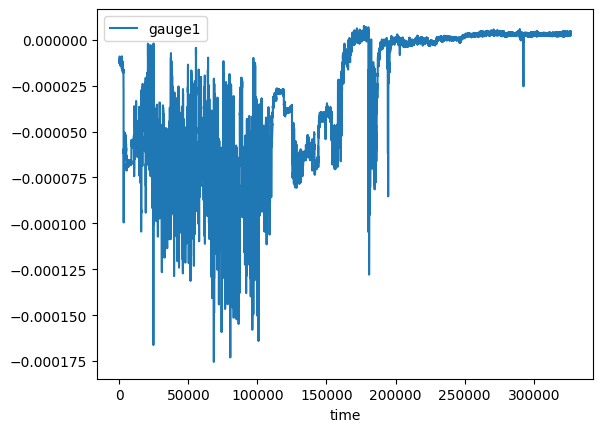

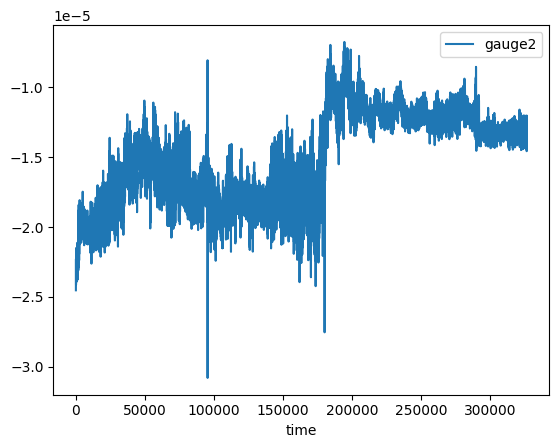

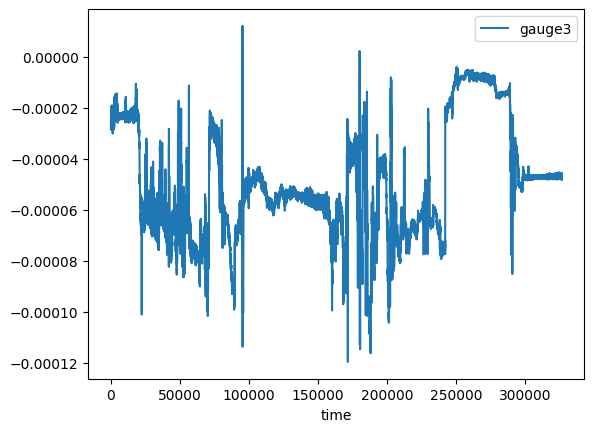

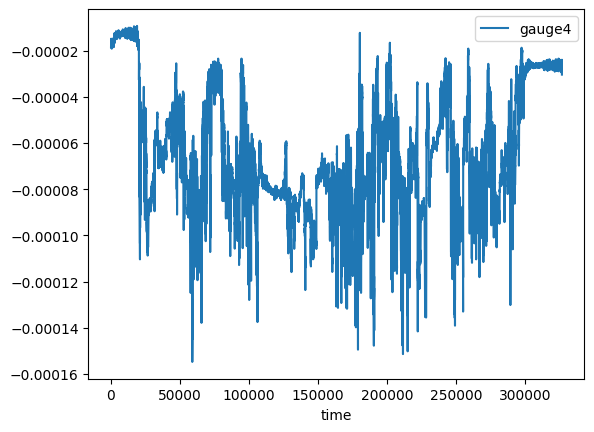

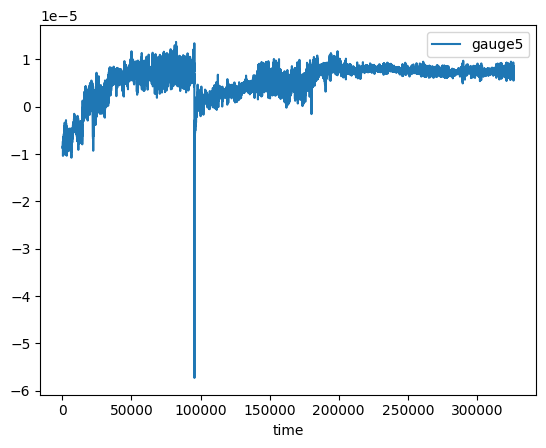

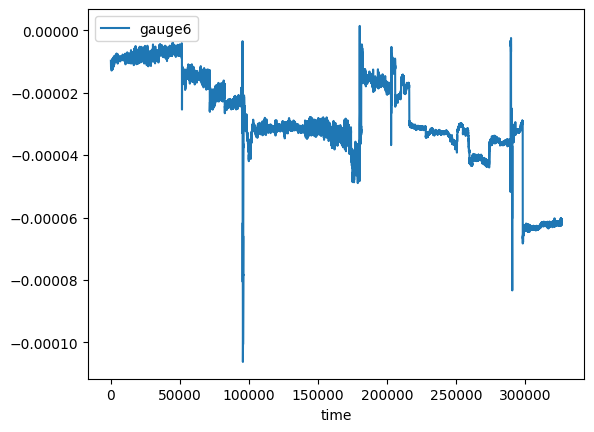

In [48]:
frcoVZeroedStrainfiltered.plot(x = "time", y = "gauge1", kind = 'line')
frcoVZeroedStrainfiltered.plot(x = "time", y = "gauge2", kind = 'line')
frcoVZeroedStrainfiltered.plot(x = "time", y = "gauge3", kind = 'line')
frcoVZeroedStrainfiltered.plot(x = "time", y = "gauge4", kind = 'line')
frcoVZeroedStrainfiltered.plot(x = "time", y = "gauge5", kind = 'line')
frcoVZeroedStrainfiltered.plot(x = "time", y = "gauge6", kind = 'line')

### Front Cone Numbers - post filtered

In [68]:
frcoVZeroedStrainfiltered.describe()

,time,gauge1,gauge2,gauge3,gauge4,gauge5,gauge6
count,110700.000000,110700.000000,110700.000000,110700.000000,110700.000000,110700.000000,110700.000000
mean,162817.040596,-0.000030,-0.000015,-0.000050,-0.000065,0.000006,-0.000028
std,94412.799057,0.000034,0.000003,0.000022,0.000027,0.000004,0.000015
min,267.000000,-0.000175,-0.000031,-0.000120,-0.000155,-0.000057,-0.000106
25%,80805.500000,-0.000060,-0.000018,-0.000065,-0.000084,0.000004,-0.000034
50%,162559.000000,-0.000021,-0.000015,-0.000054,-0.000070,0.000007,-0.000031
75%,244629.500000,0.000002,-0.000012,-0.000036,-0.000044,0.000008,-0.000016
max,326679.000000,0.000008,-0.000007,0.000012,-0.000009,0.000014,0.000001


### Filtering Front Acceleration/Braking

In [51]:
fraccVZeroedStraing1 = fraccVZeroedStrain[['gauge1']]
fraccVZeroedStraing2 = fraccVZeroedStrain[['gauge2']]
fraccVZeroedStraing3 = fraccVZeroedStrain[['gauge3']]
fraccVZeroedStraing4 = fraccVZeroedStrain[['gauge4']]
fraccVZeroedStraing5 = fraccVZeroedStrain[['gauge5']]
fraccVZeroedStraing6 = fraccVZeroedStrain[['gauge6']]

fraccVZeroedStraing1array = fraccVZeroedStraing1.to_numpy()
fraccVZeroedStraing2array = fraccVZeroedStraing2.to_numpy()
fraccVZeroedStraing3array = fraccVZeroedStraing3.to_numpy()
fraccVZeroedStraing4array = fraccVZeroedStraing4.to_numpy()
fraccVZeroedStraing5array = fraccVZeroedStraing5.to_numpy()
fraccVZeroedStraing6array = fraccVZeroedStraing6.to_numpy()

fraccVZeroedStraing1array = np.ravel(fraccVZeroedStraing1array)
fraccVZeroedStraing2array = np.ravel(fraccVZeroedStraing2array)
fraccVZeroedStraing3array = np.ravel(fraccVZeroedStraing3array)
fraccVZeroedStraing4array = np.ravel(fraccVZeroedStraing4array)
fraccVZeroedStraing5array = np.ravel(fraccVZeroedStraing5array)
fraccVZeroedStraing6array = np.ravel(fraccVZeroedStraing6array)

fraccVZeroedStraing1arrayfiltered = savgol_filter(fraccVZeroedStraing1array, 25, 5)
fraccVZeroedStraing2arrayfiltered = savgol_filter(fraccVZeroedStraing2array, 25, 5)
fraccVZeroedStraing3arrayfiltered = savgol_filter(fraccVZeroedStraing3array, 25, 5)
fraccVZeroedStraing4arrayfiltered = savgol_filter(fraccVZeroedStraing4array, 25, 5)
fraccVZeroedStraing5arrayfiltered = savgol_filter(fraccVZeroedStraing5array, 25, 5)
fraccVZeroedStraing6arrayfiltered = savgol_filter(fraccVZeroedStraing6array, 25, 5)

fraccVZeroedStraing1filtered = pd.DataFrame(fraccVZeroedStraing1arrayfiltered, columns = ['gauge1'])
fraccVZeroedStraing2filtered = pd.DataFrame(fraccVZeroedStraing2arrayfiltered, columns = ['gauge2'])
fraccVZeroedStraing3filtered = pd.DataFrame(fraccVZeroedStraing3arrayfiltered, columns = ['gauge3'])
fraccVZeroedStraing4filtered = pd.DataFrame(fraccVZeroedStraing4arrayfiltered, columns = ['gauge4'])
fraccVZeroedStraing5filtered = pd.DataFrame(fraccVZeroedStraing5arrayfiltered, columns = ['gauge5'])
fraccVZeroedStraing6filtered = pd.DataFrame(fraccVZeroedStraing6arrayfiltered, columns = ['gauge6'])

fraccVZeroedStrainfiltered = pd.concat([fraccTime, fraccVZeroedStraing1filtered, fraccVZeroedStraing2filtered,
                                       fraccVZeroedStraing3filtered, fraccVZeroedStraing4filtered, 
                                       fraccVZeroedStraing5filtered, fraccVZeroedStraing6filtered], axis = 1)

### Plotting Front Acceleration/Braking - post filtering

<AxesSubplot:xlabel='time'>

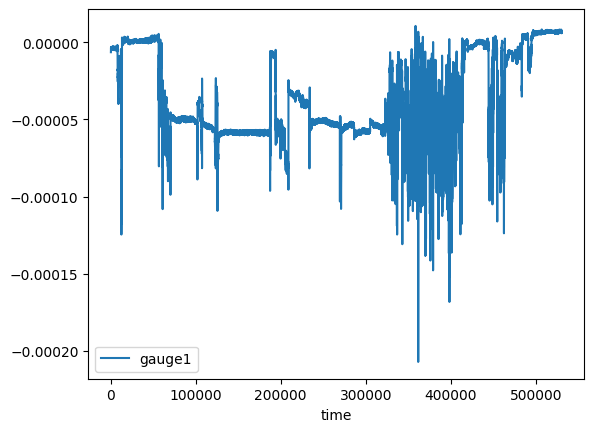

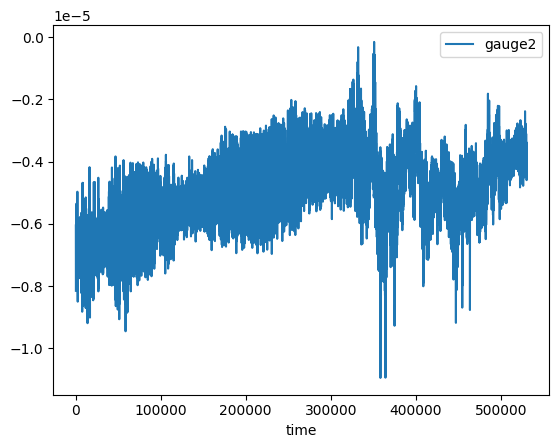

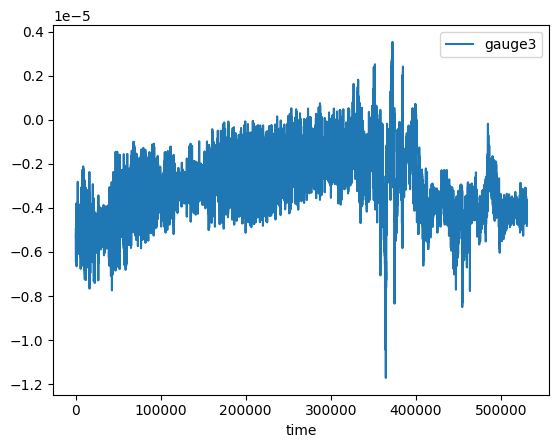

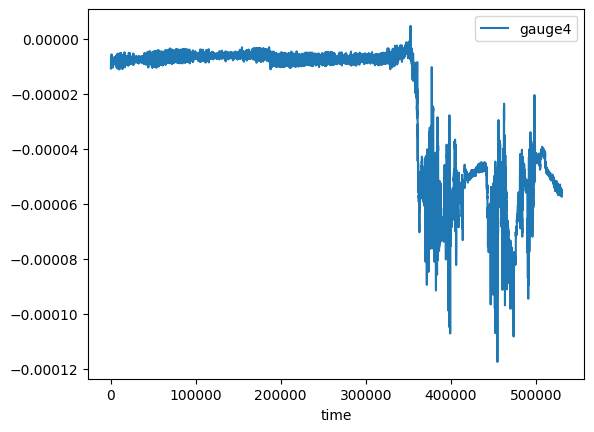

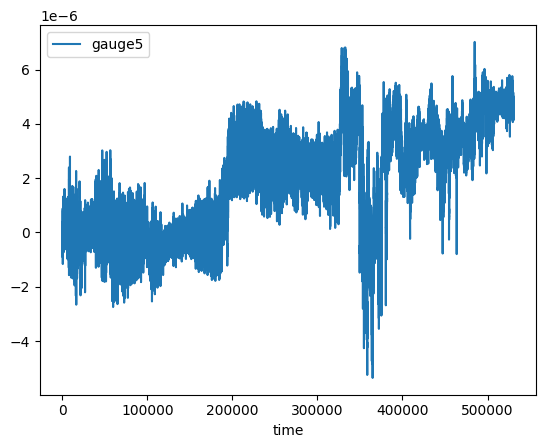

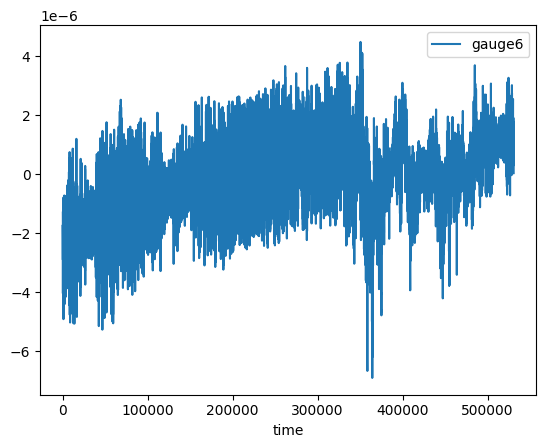

In [52]:
fraccVZeroedStrainfiltered.plot(x = "time", y = "gauge1", kind = 'line')
fraccVZeroedStrainfiltered.plot(x = "time", y = "gauge2", kind = 'line')
fraccVZeroedStrainfiltered.plot(x = "time", y = "gauge3", kind = 'line')
fraccVZeroedStrainfiltered.plot(x = "time", y = "gauge4", kind = 'line')
fraccVZeroedStrainfiltered.plot(x = "time", y = "gauge5", kind = 'line')
fraccVZeroedStrainfiltered.plot(x = "time", y = "gauge6", kind = 'line')

### Front Acceleration/Braking Numbers - post filtering

In [69]:
fraccVZeroedStrainfiltered.describe()

,time,gauge1,gauge2,gauge3,gauge4,gauge5,gauge6
count,179550.000000,179550.000000,1.795500e+05,179550.000000,179550.000000,1.795500e+05,1.795500e+05
mean,264769.762963,-0.000036,-4.926361e-06,-0.000003,-0.000023,1.863517e-06,-1.914061e-07
std,153391.772761,0.000027,1.101079e-06,0.000001,0.000024,1.870422e-06,1.139590e-06
min,282.000000,-0.000207,-1.094876e-05,-0.000012,-0.000118,-5.358355e-06,-6.913216e-06
25%,131571.250000,-0.000057,-5.638575e-06,-0.000004,-0.000047,4.913998e-08,-8.928314e-07
50%,264653.500000,-0.000049,-4.863596e-06,-0.000003,-0.000008,2.191275e-06,-1.018290e-07
75%,397664.750000,-0.000005,-4.093478e-06,-0.000002,-0.000006,3.390578e-06,6.228331e-07
max,530616.000000,0.000011,-1.523319e-07,0.000004,0.000005,7.021249e-06,4.492127e-06


### Filtering Front Turning

In [56]:
frturnVZeroedStraing1 = frturnVZeroedStrain[['gauge1']]
frturnVZeroedStraing2 = frturnVZeroedStrain[['gauge2']]
frturnVZeroedStraing3 = frturnVZeroedStrain[['gauge3']]
frturnVZeroedStraing4 = frturnVZeroedStrain[['gauge4']]
frturnVZeroedStraing5 = frturnVZeroedStrain[['gauge5']]
frturnVZeroedStraing6 = frturnVZeroedStrain[['gauge6']]

frturnVZeroedStraing1array = frturnVZeroedStraing1.to_numpy()
frturnVZeroedStraing2array = frturnVZeroedStraing2.to_numpy()
frturnVZeroedStraing3array = frturnVZeroedStraing3.to_numpy()
frturnVZeroedStraing4array = frturnVZeroedStraing4.to_numpy()
frturnVZeroedStraing5array = frturnVZeroedStraing5.to_numpy()
frturnVZeroedStraing6array = frturnVZeroedStraing6.to_numpy()

frturnVZeroedStraing1array = np.ravel(frturnVZeroedStraing1array)
frturnVZeroedStraing2array = np.ravel(frturnVZeroedStraing2array)
frturnVZeroedStraing3array = np.ravel(frturnVZeroedStraing3array)
frturnVZeroedStraing4array = np.ravel(frturnVZeroedStraing4array)
frturnVZeroedStraing5array = np.ravel(frturnVZeroedStraing5array)
frturnVZeroedStraing6array = np.ravel(frturnVZeroedStraing6array)

frturnVZeroedStraing1arrayfiltered = savgol_filter(frturnVZeroedStraing1array, 25, 5)
frturnVZeroedStraing2arrayfiltered = savgol_filter(frturnVZeroedStraing2array, 25, 5)
frturnVZeroedStraing3arrayfiltered = savgol_filter(frturnVZeroedStraing3array, 25, 5)
frturnVZeroedStraing4arrayfiltered = savgol_filter(frturnVZeroedStraing4array, 25, 5)
frturnVZeroedStraing5arrayfiltered = savgol_filter(frturnVZeroedStraing5array, 25, 5)
frturnVZeroedStraing6arrayfiltered = savgol_filter(frturnVZeroedStraing6array, 25, 5)

frturnVZeroedStraing1filtered = pd.DataFrame(frturnVZeroedStraing1arrayfiltered, columns = ['gauge1'])
frturnVZeroedStraing2filtered = pd.DataFrame(frturnVZeroedStraing2arrayfiltered, columns = ['gauge2'])
frturnVZeroedStraing3filtered = pd.DataFrame(frturnVZeroedStraing3arrayfiltered, columns = ['gauge3'])
frturnVZeroedStraing4filtered = pd.DataFrame(frturnVZeroedStraing4arrayfiltered, columns = ['gauge4'])
frturnVZeroedStraing5filtered = pd.DataFrame(frturnVZeroedStraing5arrayfiltered, columns = ['gauge5'])
frturnVZeroedStraing6filtered = pd.DataFrame(frturnVZeroedStraing6arrayfiltered, columns = ['gauge6'])

frturnVZeroedStrainfiltered = pd.concat([frturnTime, frturnVZeroedStraing1filtered, frturnVZeroedStraing2filtered,
                                       frturnVZeroedStraing3filtered, frturnVZeroedStraing4filtered, 
                                       frturnVZeroedStraing5filtered, frturnVZeroedStraing6filtered], axis = 1)

### Plotting Front Turning - post filtering

<AxesSubplot:xlabel='time'>

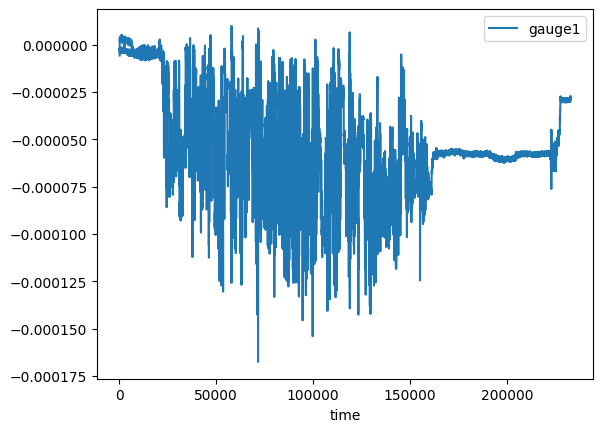

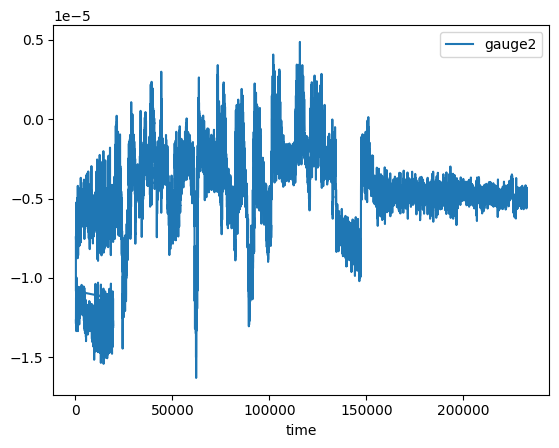

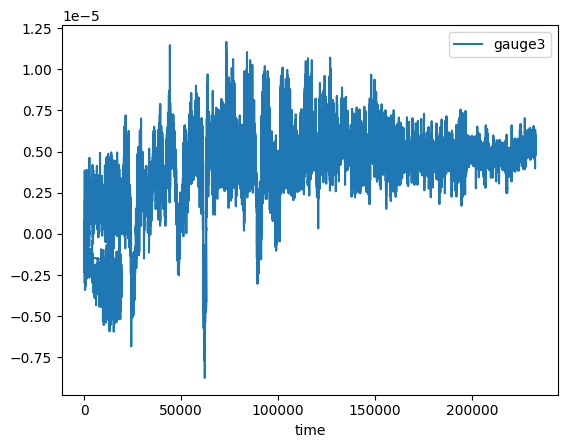

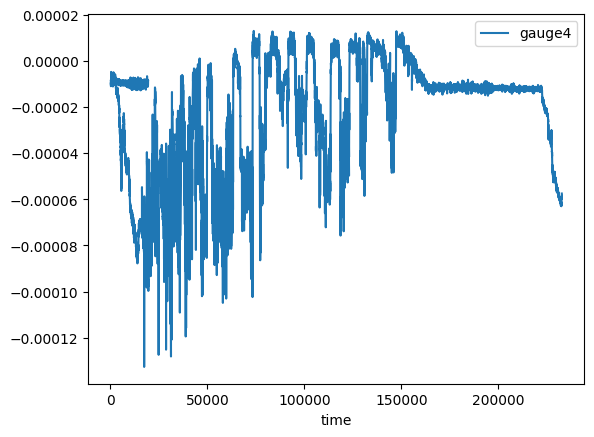

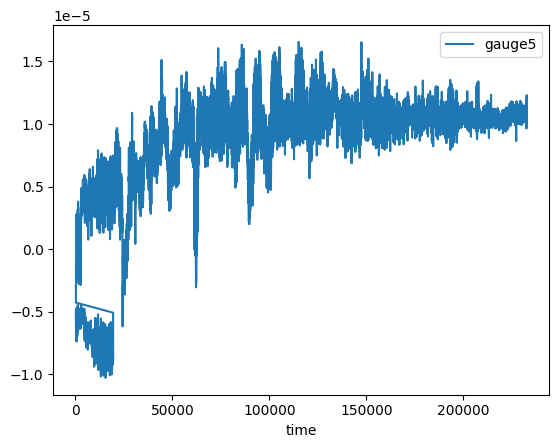

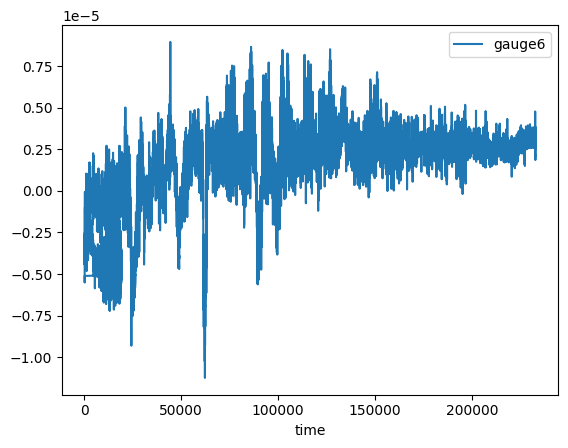

In [57]:
frturnVZeroedStrainfiltered.plot(x = "time", y = "gauge1", kind = 'line')
frturnVZeroedStrainfiltered.plot(x = "time", y = "gauge2", kind = 'line')
frturnVZeroedStrainfiltered.plot(x = "time", y = "gauge3", kind = 'line')
frturnVZeroedStrainfiltered.plot(x = "time", y = "gauge4", kind = 'line')
frturnVZeroedStrainfiltered.plot(x = "time", y = "gauge5", kind = 'line')
frturnVZeroedStrainfiltered.plot(x = "time", y = "gauge6", kind = 'line')

### Front Turning Numbers - post filtered

In [70]:
frturnVZeroedStrainfiltered.describe()

,time,gauge1,gauge2,gauge3,gauge4,gauge5,gauge6
count,85770.000000,85770.000000,85770.000000,85770.000000,85770.000000,85770.000000,8.577000e+04
mean,107711.730687,-0.000049,-0.000005,0.000004,-0.000022,0.000008,1.443245e-06
std,70534.140822,0.000029,0.000003,0.000003,0.000025,0.000005,2.510617e-06
min,254.000000,-0.000168,-0.000016,-0.000009,-0.000133,-0.000010,-1.124816e-05
25%,43138.500000,-0.000064,-0.000006,0.000003,-0.000040,0.000007,3.177477e-07
50%,105723.500000,-0.000057,-0.000005,0.000005,-0.000012,0.000010,2.340466e-06
75%,169260.500000,-0.000028,-0.000003,0.000005,-0.000008,0.000011,2.967946e-06
max,232751.000000,0.000010,0.000005,0.000012,0.000013,0.000017,8.955356e-06


### Filtering Back Braking

In [58]:
bkbrVZeroedStraing1 = bkbrVZeroedStrain[['gauge1']]
bkbrVZeroedStraing2 = bkbrVZeroedStrain[['gauge2']]
bkbrVZeroedStraing3 = bkbrVZeroedStrain[['gauge3']]
bkbrVZeroedStraing4 = bkbrVZeroedStrain[['gauge4']]
bkbrVZeroedStraing5 = bkbrVZeroedStrain[['gauge5']]
bkbrVZeroedStraing6 = bkbrVZeroedStrain[['gauge6']]

bkbrVZeroedStraing1array = bkbrVZeroedStraing1.to_numpy()
bkbrVZeroedStraing2array = bkbrVZeroedStraing2.to_numpy()
bkbrVZeroedStraing3array = bkbrVZeroedStraing3.to_numpy()
bkbrVZeroedStraing4array = bkbrVZeroedStraing4.to_numpy()
bkbrVZeroedStraing5array = bkbrVZeroedStraing5.to_numpy()
bkbrVZeroedStraing6array = bkbrVZeroedStraing6.to_numpy()

bkbrVZeroedStraing1array = np.ravel(bkbrVZeroedStraing1array)
bkbrVZeroedStraing2array = np.ravel(bkbrVZeroedStraing2array)
bkbrVZeroedStraing3array = np.ravel(bkbrVZeroedStraing3array)
bkbrVZeroedStraing4array = np.ravel(bkbrVZeroedStraing4array)
bkbrVZeroedStraing5array = np.ravel(bkbrVZeroedStraing5array)
bkbrVZeroedStraing6array = np.ravel(bkbrVZeroedStraing6array)

bkbrVZeroedStraing1arrayfiltered = savgol_filter(bkbrVZeroedStraing1array, 25, 5)
bkbrVZeroedStraing2arrayfiltered = savgol_filter(bkbrVZeroedStraing2array, 25, 5)
bkbrVZeroedStraing3arrayfiltered = savgol_filter(bkbrVZeroedStraing3array, 25, 5)
bkbrVZeroedStraing4arrayfiltered = savgol_filter(bkbrVZeroedStraing4array, 25, 5)
bkbrVZeroedStraing5arrayfiltered = savgol_filter(bkbrVZeroedStraing5array, 25, 5)
bkbrVZeroedStraing6arrayfiltered = savgol_filter(bkbrVZeroedStraing6array, 25, 5)

bkbrVZeroedStraing1filtered = pd.DataFrame(bkbrVZeroedStraing1arrayfiltered, columns = ['gauge1'])
bkbrVZeroedStraing2filtered = pd.DataFrame(bkbrVZeroedStraing2arrayfiltered, columns = ['gauge2'])
bkbrVZeroedStraing3filtered = pd.DataFrame(bkbrVZeroedStraing3arrayfiltered, columns = ['gauge3'])
bkbrVZeroedStraing4filtered = pd.DataFrame(bkbrVZeroedStraing4arrayfiltered, columns = ['gauge4'])
bkbrVZeroedStraing5filtered = pd.DataFrame(bkbrVZeroedStraing5arrayfiltered, columns = ['gauge5'])
bkbrVZeroedStraing6filtered = pd.DataFrame(bkbrVZeroedStraing6arrayfiltered, columns = ['gauge6'])

bkbrVZeroedStrainfiltered = pd.concat([bkbrTime, bkbrVZeroedStraing1filtered, bkbrVZeroedStraing2filtered,
                                       bkbrVZeroedStraing3filtered, bkbrVZeroedStraing4filtered, 
                                       bkbrVZeroedStraing5filtered, bkbrVZeroedStraing6filtered], axis = 1)

### Plotting Back Braking - post filtered

<AxesSubplot:xlabel='time'>

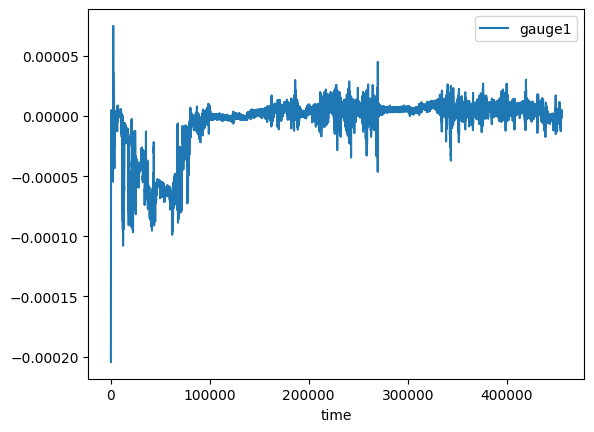

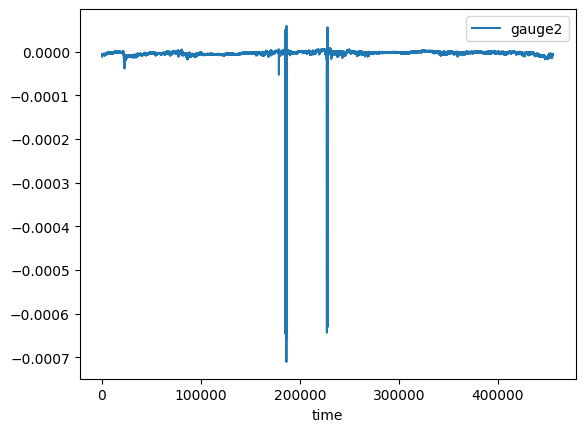

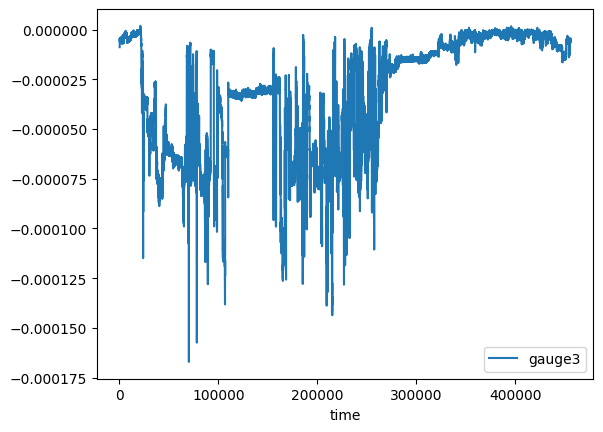

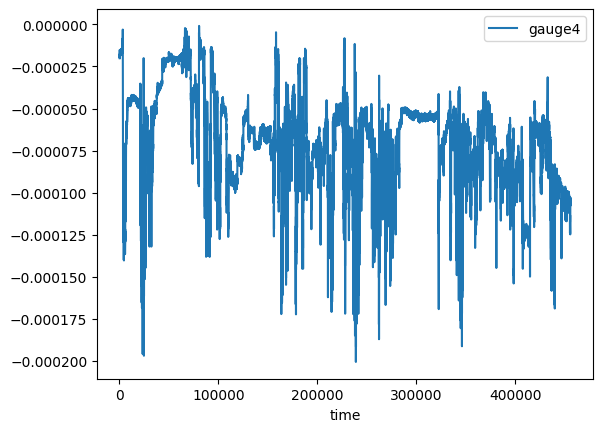

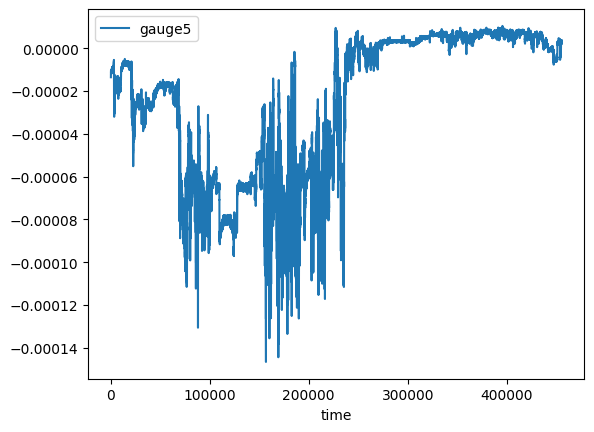

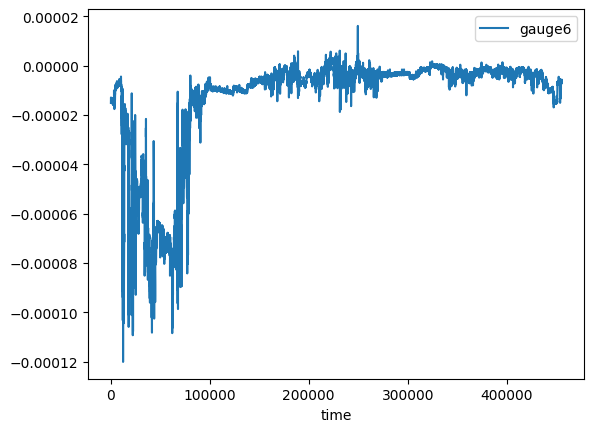

In [59]:
bkbrVZeroedStrainfiltered.plot(x = "time", y = "gauge1", kind = 'line')
bkbrVZeroedStrainfiltered.plot(x = "time", y = "gauge2", kind = 'line')
bkbrVZeroedStrainfiltered.plot(x = "time", y = "gauge3", kind = 'line')
bkbrVZeroedStrainfiltered.plot(x = "time", y = "gauge4", kind = 'line')
bkbrVZeroedStrainfiltered.plot(x = "time", y = "gauge5", kind = 'line')
bkbrVZeroedStrainfiltered.plot(x = "time", y = "gauge6", kind = 'line')

### Back Breaking Numbers - post filtering

In [71]:
bkbrVZeroedStrainfiltered.describe()

,time,gauge1,gauge2,gauge3,gauge4,gauge5,gauge6
count,154410.000000,154410.000000,154410.000000,154410.000000,1.544100e+05,154410.000000,154410.000000
mean,227291.995143,-0.000004,-0.000005,-0.000031,-6.962938e-05,-0.000025,-0.000014
std,131702.679977,0.000022,0.000035,0.000029,2.855016e-05,0.000034,0.000022
min,188.000000,-0.000204,-0.000710,-0.000167,-2.005298e-04,-0.000147,-0.000120
25%,112836.250000,-0.000001,-0.000005,-0.000056,-8.833063e-05,-0.000060,-0.000010
50%,227135.000000,0.000004,-0.000003,-0.000026,-6.723501e-05,-0.000008,-0.000005
75%,341403.500000,0.000007,-0.000001,-0.000005,-5.321598e-05,0.000004,-0.000003
max,455616.000000,0.000075,0.000059,0.000002,-9.436334e-07,0.000010,0.000016


### Filtering Back Turning

In [61]:
bkturnVZeroedStraing1 = bkturnVZeroedStrain[['gauge1']]
bkturnVZeroedStraing2 = bkturnVZeroedStrain[['gauge2']]
bkturnVZeroedStraing3 = bkturnVZeroedStrain[['gauge3']]
bkturnVZeroedStraing4 = bkturnVZeroedStrain[['gauge4']]
bkturnVZeroedStraing5 = bkturnVZeroedStrain[['gauge5']]
bkturnVZeroedStraing6 = bkturnVZeroedStrain[['gauge6']]

bkturnVZeroedStraing1array = bkturnVZeroedStraing1.to_numpy()
bkturnVZeroedStraing2array = bkturnVZeroedStraing2.to_numpy()
bkturnVZeroedStraing3array = bkturnVZeroedStraing3.to_numpy()
bkturnVZeroedStraing4array = bkturnVZeroedStraing4.to_numpy()
bkturnVZeroedStraing5array = bkturnVZeroedStraing5.to_numpy()
bkturnVZeroedStraing6array = bkturnVZeroedStraing6.to_numpy()

bkturnVZeroedStraing1array = np.ravel(bkturnVZeroedStraing1array)
bkturnVZeroedStraing2array = np.ravel(bkturnVZeroedStraing2array)
bkturnVZeroedStraing3array = np.ravel(bkturnVZeroedStraing3array)
bkturnVZeroedStraing4array = np.ravel(bkturnVZeroedStraing4array)
bkturnVZeroedStraing5array = np.ravel(bkturnVZeroedStraing5array)
bkturnVZeroedStraing6array = np.ravel(bkturnVZeroedStraing6array)

bkturnVZeroedStraing1arrayfiltered = savgol_filter(bkturnVZeroedStraing1array, 25, 5)
bkturnVZeroedStraing2arrayfiltered = savgol_filter(bkturnVZeroedStraing2array, 25, 5)
bkturnVZeroedStraing3arrayfiltered = savgol_filter(bkturnVZeroedStraing3array, 25, 5)
bkturnVZeroedStraing4arrayfiltered = savgol_filter(bkturnVZeroedStraing4array, 25, 5)
bkturnVZeroedStraing5arrayfiltered = savgol_filter(bkturnVZeroedStraing5array, 25, 5)
bkturnVZeroedStraing6arrayfiltered = savgol_filter(bkturnVZeroedStraing6array, 25, 5)

bkturnVZeroedStraing1filtered = pd.DataFrame(bkturnVZeroedStraing1arrayfiltered, columns = ['gauge1'])
bkturnVZeroedStraing2filtered = pd.DataFrame(bkturnVZeroedStraing2arrayfiltered, columns = ['gauge2'])
bkturnVZeroedStraing3filtered = pd.DataFrame(bkturnVZeroedStraing3arrayfiltered, columns = ['gauge3'])
bkturnVZeroedStraing4filtered = pd.DataFrame(bkturnVZeroedStraing4arrayfiltered, columns = ['gauge4'])
bkturnVZeroedStraing5filtered = pd.DataFrame(bkturnVZeroedStraing5arrayfiltered, columns = ['gauge5'])
bkturnVZeroedStraing6filtered = pd.DataFrame(bkturnVZeroedStraing6arrayfiltered, columns = ['gauge6'])

bkturnVZeroedStrainfiltered = pd.concat([bkturnTime, bkturnVZeroedStraing1filtered, bkturnVZeroedStraing2filtered,
                                       bkturnVZeroedStraing3filtered, bkturnVZeroedStraing4filtered, 
                                       bkturnVZeroedStraing5filtered, bkturnVZeroedStraing6filtered], axis = 1)

### Plotting Back Turning - post filtering

<AxesSubplot:xlabel='time'>

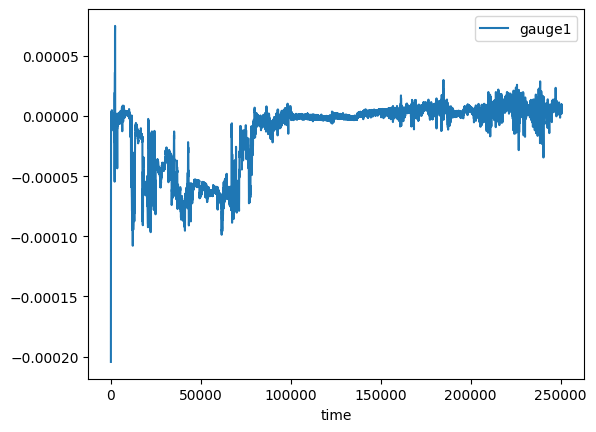

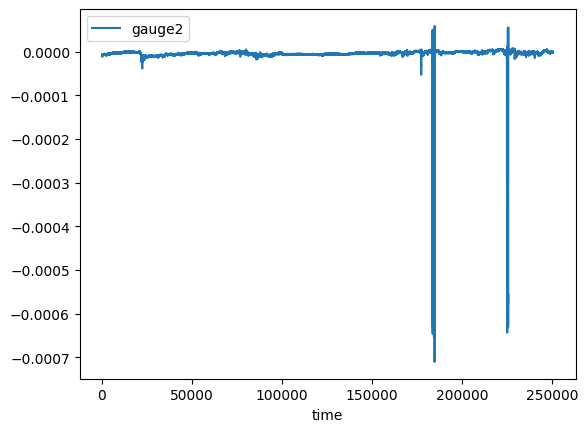

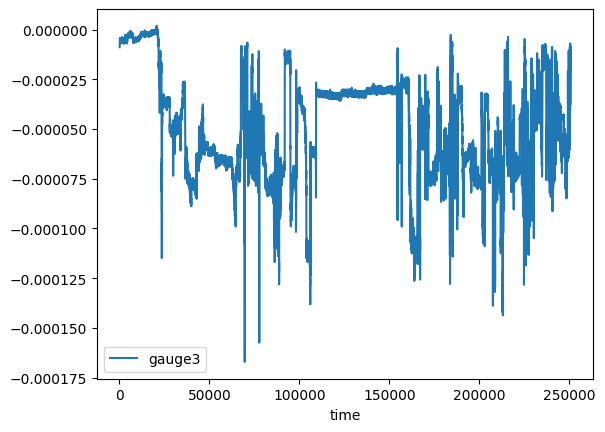

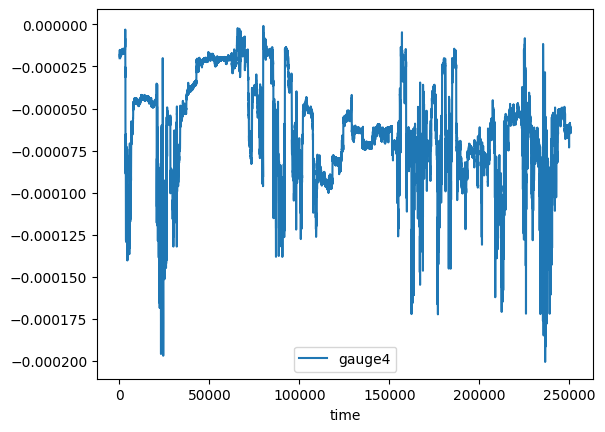

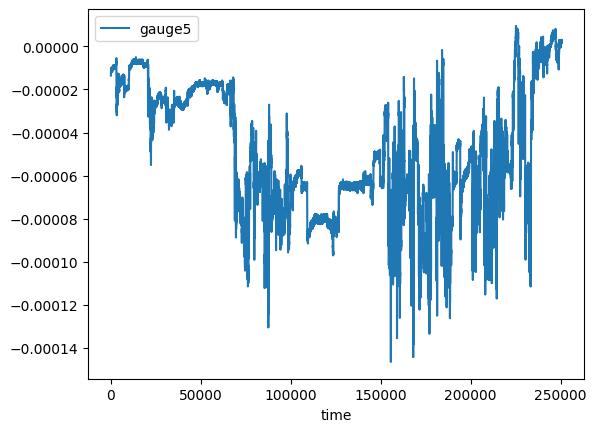

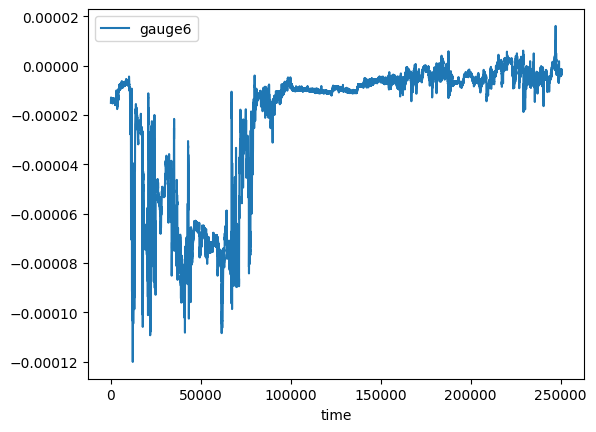

In [62]:
bkturnVZeroedStrainfiltered.plot(x = "time", y = "gauge1", kind = 'line')
bkturnVZeroedStrainfiltered.plot(x = "time", y = "gauge2", kind = 'line')
bkturnVZeroedStrainfiltered.plot(x = "time", y = "gauge3", kind = 'line')
bkturnVZeroedStrainfiltered.plot(x = "time", y = "gauge4", kind = 'line')
bkturnVZeroedStrainfiltered.plot(x = "time", y = "gauge5", kind = 'line')
bkturnVZeroedStrainfiltered.plot(x = "time", y = "gauge6", kind = 'line')

### Back Turning Numbers - post filtering

In [72]:
bkturnVZeroedStrainfiltered.describe()

,time,gauge1,gauge2,gauge3,gauge4,gauge5,gauge6
count,85950.000000,154410.000000,154410.000000,154410.000000,1.544100e+05,154410.000000,154410.000000
mean,125137.221815,-0.000004,-0.000005,-0.000031,-6.962938e-05,-0.000025,-0.000014
std,72427.811801,0.000022,0.000035,0.000029,2.855016e-05,0.000034,0.000022
min,187.000000,-0.000204,-0.000710,-0.000167,-2.005298e-04,-0.000147,-0.000120
25%,62316.250000,-0.000001,-0.000005,-0.000056,-8.833063e-05,-0.000060,-0.000010
50%,125047.500000,0.000004,-0.000003,-0.000026,-6.723501e-05,-0.000008,-0.000005
75%,187897.750000,0.000007,-0.000001,-0.000005,-5.321598e-05,0.000004,-0.000003
max,250652.000000,0.000075,0.000059,0.000002,-9.436334e-07,0.000010,0.000016


### Exporting to CSV

In [76]:
frcoVZeroedStrain.to_csv('FrontConeNoFilter.csv')
fraccVZeroedStrain.to_csv('FrontAccNoFilter.csv')
frturnVZeroedStrain.to_csv('FrontTurnNoFilter.csv')
bkbrVZeroedStrain.to_csv('BackBrakeNoFilter.csv')
bkturnVZeroedStrain.to_csv('BackTurnNoFilter.csv')

frcoVZeroedStrainfiltered.to_csv('FrontConeFilter.csv')
fraccVZeroedStrainfiltered.to_csv('FrontAccFilter.csv')
frturnVZeroedStrainfiltered.to_csv('FrontTurnFilter.csv')
bkbrVZeroedStrainfiltered.to_csv('BackBrakeFilter.csv')
bkturnVZeroedStrainfiltered.to_csv('BackTurnFilter.csv')